In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style="white", color_codes=True)

# Specify the encoding parameter
cancer_reg1 = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\datasets ds\cancer_reg\cancer_reg.csv", encoding='latin-1')

cancer_reg1.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
cancer_reg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [4]:
# Remove leading and trailing spaces from column names
cancer_reg1.columns = cancer_reg1.columns.str.strip()

In [5]:
columns_dropped=['binnedInc','PctPrivateCoverageAlone','PctEmployed16_Over','PctSomeCol18_24']
cancer_reg1.drop(columns_dropped,axis=1, inplace=True)

In [6]:
# Function to fill missing values based on column type
def fill_missing(life_expec):
    for col in cancer_reg1.columns:
        if pd.api.types.is_numeric_dtype(cancer_reg1[col]):
            # Fill numeric columns with the mean
            cancer_reg1[col].fillna(cancer_reg1[col].mean(), inplace=True)
        elif pd.api.types.is_categorical_dtype(cancer_reg1[col]):
            # Fill categorical columns with the median
            cancer_reg1[col].fillna(df[col].mode()[0], inplace=True)  # Using mode() instead of median for categorical data

# Call the function to fill missing values
fill_missing(cancer_reg1)

In [7]:
cancer_reg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   TARGET_deathRate        3047 non-null   float64
 3   incidenceRate           3047 non-null   float64
 4   medIncome               3047 non-null   int64  
 5   popEst2015              3047 non-null   int64  
 6   povertyPercent          3047 non-null   float64
 7   studyPerCap             3047 non-null   float64
 8   MedianAge               3047 non-null   float64
 9   MedianAgeMale           3047 non-null   float64
 10  MedianAgeFemale         3047 non-null   float64
 11  Geography               3047 non-null   object 
 12  AvgHouseholdSize        3047 non-null   float64
 13  PercentMarried          3047 non-null   float64
 14  PctNoHS18_24            3047 non-null   

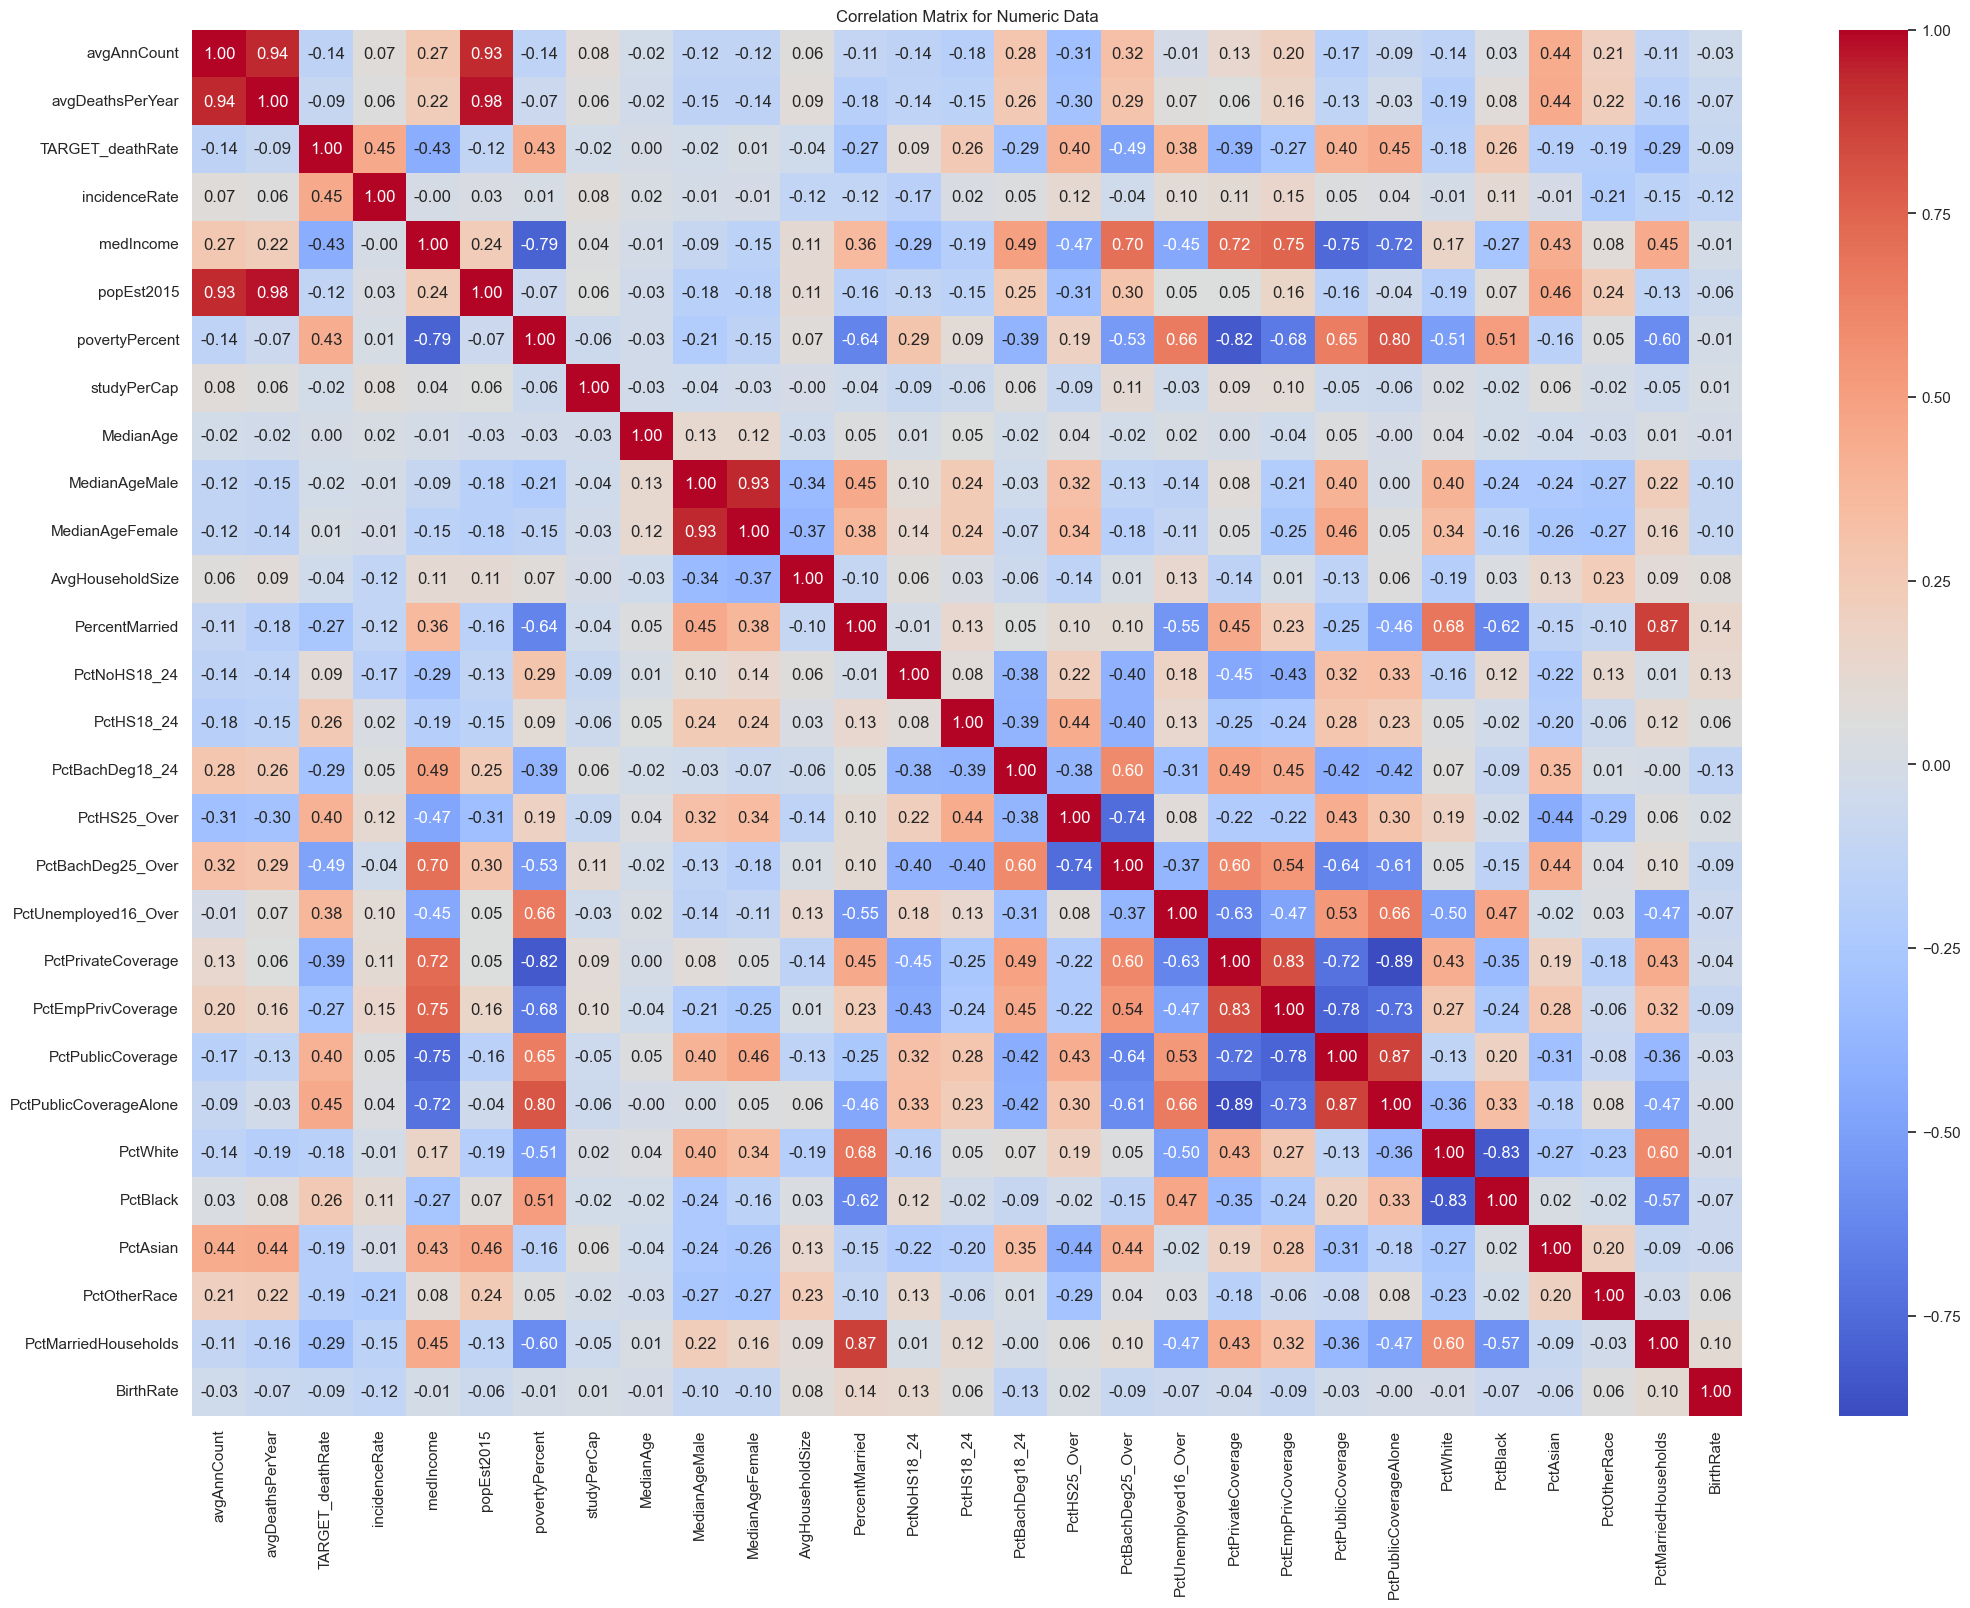

In [8]:
numeric_columns = cancer_reg1.select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Data')
plt.show()


In [9]:
cancer_reg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   TARGET_deathRate        3047 non-null   float64
 3   incidenceRate           3047 non-null   float64
 4   medIncome               3047 non-null   int64  
 5   popEst2015              3047 non-null   int64  
 6   povertyPercent          3047 non-null   float64
 7   studyPerCap             3047 non-null   float64
 8   MedianAge               3047 non-null   float64
 9   MedianAgeMale           3047 non-null   float64
 10  MedianAgeFemale         3047 non-null   float64
 11  Geography               3047 non-null   object 
 12  AvgHouseholdSize        3047 non-null   float64
 13  PercentMarried          3047 non-null   float64
 14  PctNoHS18_24            3047 non-null   

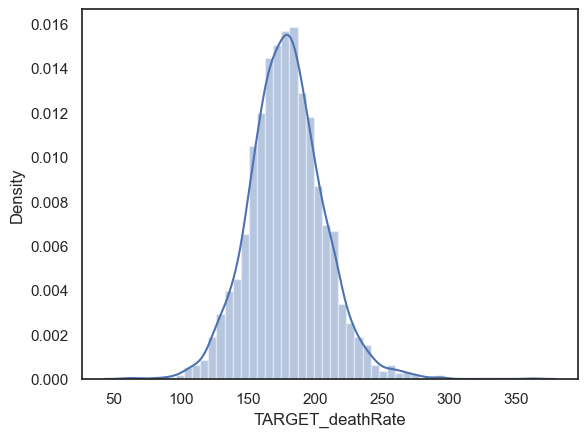

In [10]:
sns.distplot(cancer_reg1['TARGET_deathRate'])
plt.show()

In [11]:
cancer_reg1.keys()

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

### Model Development

In [12]:
X=cancer_reg1[[ 'incidenceRate', 'medIncome',
       'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPublicCoverage', 'PctWhite', 'PctAsian', 'PctOtherRace',
       'BirthRate']]
y=cancer_reg1['TARGET_deathRate']

In [13]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing
test_size = 0.2
random_state = 42  # You can change this value for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2437, 19) (2437,)
Testing set shape: (610, 19) (610,)


In [14]:
columns_to_convert = ['incidenceRate', 'medIncome',
       'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'AvgHouseholdSize', 'PercentMarried',
       'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over',
       'PctUnemployed16_Over', 'PctPublicCoverage', 'PctWhite', 'PctAsian',
       'PctOtherRace', 'BirthRate']

for column in columns_to_convert:
    X_train[column] = pd.to_numeric(X_train[column], errors='coerce')

X_train = X_train.dropna()
y_train=y_train.dropna()
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2437, 19) (2437,)
Testing set shape: (610, 19) (610,)


### Regularization

In [15]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [16]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}


# defining cross validation folds as 5
folds = 5
ridge = Ridge()

In [17]:
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### LinearRegression

In [18]:
#Creating and Training the LinearRegression Model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model evaluation

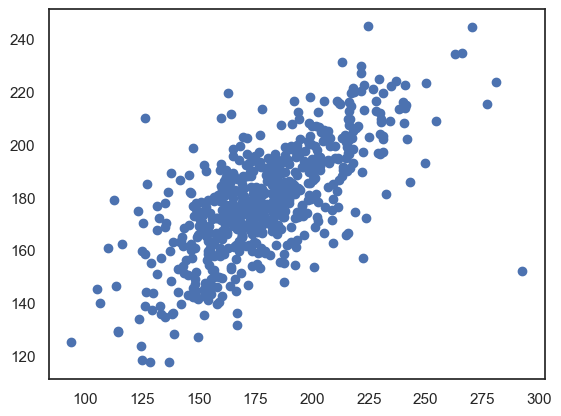

In [19]:
predictions= lm.predict(X_test)
plt.scatter(y_test,predictions)

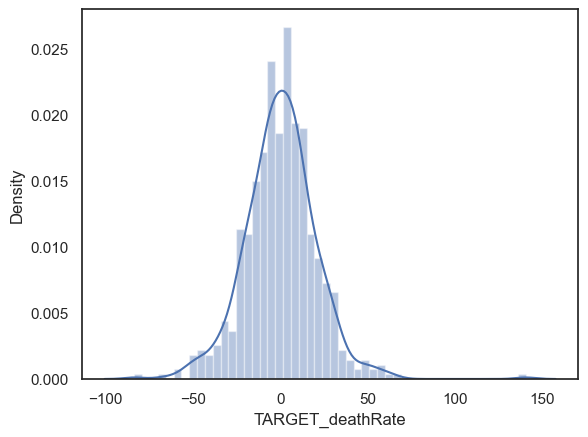

In [20]:
sns.distplot((y_test-predictions),bins=50);

In [21]:
import numpy as np
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE: 15.248080068313428
MSE: 420.3202992908995
RMSE: 20.50171454515206


### Random forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and fit the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the rf_regressor
train_score = rf_regressor.score(X_train, y_train)
test_score = rf_regressor.score(X_test, y_test)

# Alternatively, you can use a metric like R-squared for evaluation
# train_score = r2_score(y_train, rf_regressor.predict(X_train))
# test_score = r2_score(y_test, y_pred)

# Print the scores
#print("Test Score:", test_score)
print(metrics.mean_squared_error(y_test,y_pred))

396.1530625016394


### Support Vector Machine  

In [25]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVR model
svm_regressor = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'rbf', etc.
svm_regressor.fit(X_train, y_train)

# Making the predictions on the test set
y_pred_svm = svm_regressor.predict(X_test)

# Evaluate the svm_regressor
train_score_svm = svm_regressor.score(X_train, y_train)
test_score_svm = svm_regressor.score(X_test, y_test)

# Alternatively, you can use a metric like R-squared for evaluation
# train_score_svm = r2_score(y_train, svm_regressor.predict(X_train))
# test_score_svm = r2_score(y_test, y_pred_svm)

# Print the scores
#print("Training Score (SVM):", train_score_svm)
#print("Test Score (SVM):", test_score_svm)
print(metrics.mean_squared_error(y_test,y_pred_svm))

636.9382584249477


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming you have X and y defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Making the predictions on the test set
y_pred_tree = tree_regressor.predict(X_test)

# Evaluate the tree_regressor
train_score_tree = tree_regressor.score(X_train, y_train)
test_score_tree = tree_regressor.score(X_test, y_test)

# Alternatively, you can use a metric like R-squared for evaluation
# train_score_tree = r2_score(y_train, tree_regressor.predict(X_train))
# test_score_tree = r2_score(y_test, y_pred_tree)

# Print the scores
#print("Training Score (Decision Tree):", train_score_tree)
#print("Test Score (Decision Tree):", test_score_tree)
print(metrics.mean_squared_error(y_test,y_pred_tree))

779.6435737704917
